In [2]:
%load_ext autoreload
%autoreload 2

In [16]:
from lieroy import se3
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [146]:
def plot_covariance(mean, covariance, ax):
    eigvals, eigvecs = np.linalg.eig(covariance[0:2,0:2])
    
    sort_indices = np.argsort(eigvals)[::-1]
    eigvals, eigvecs = eigvals[sort_indices], eigvecs[:, sort_indices]
    
    angle = np.arctan2(eigvecs[1,0], eigvecs[0,0])
    
    width, height = 3 * np.sqrt(eigvals)

    print(eigvals)
    print(eigvecs)
    print(width)
    print(height)
    print(angle)
    
    ellipse = matplotlib.patches.Ellipse(xy=mean[0:2,3], width=width, height=height, angle=angle * 360 / (2 * np.pi), fill=False)
    ax.add_artist(ellipse)
    

In [149]:
cov1 = np.identity(6)
cov1[0,0] = 1.0
cov1[1,1] = 10.0
cov1[0,1] = 0
cov1[1,0] = 0

cov2 = np.identity(6)
cov2[0,0] = 10.0

[10.  1.]
[[0. 1.]
 [1. 0.]]
9.486832980505138
3.0
1.5707963267948966
[10.  1.]
[[1. 0.]
 [0. 1.]]
9.486832980505138
3.0
0.0


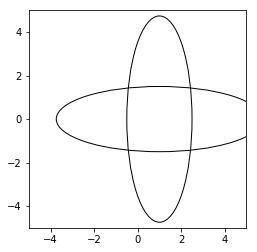

In [154]:
fig, ax = plt.subplots()

mean = np.identity(4)
plot_covariance(mean, cov1, ax)

mean[0,3] += 1.0
plot_covariance(mean, cov2, ax)

ax.set_xlim([-5.0, 5.0])
ax.set_ylim([-5.0, 5.0])
ax.set_aspect('equal')
plt.show()

[10.  1.]
[[0. 1.]
 [1. 0.]]
9.486832980505138
3.0
1.5707963267948966
[10.  1.]
[[1. 0.]
 [0. 1.]]
9.486832980505138
3.0
0.0
[10.  1.]
[[ 4.37113883e-08 -1.00000000e+00]
 [-1.00000000e+00 -4.37113883e-08]]
9.486832980505149
3.0000000000000027
-1.5707962830835083


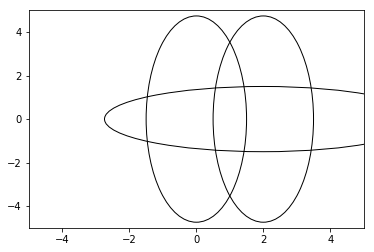

In [151]:
fig, ax = plt.subplots()

mean = np.identity(4)
plot_covariance(mean, cov1, ax)

mean[0,3] += 1.0
plot_covariance(mean, cov2, ax)

mean[0,3] += 1.0
plot_covariance(np.identity(4), rot_cov2, ax)
ax.set_xlim([-5.0, 5.0])
ax.set_ylim([-5.0, 5.0])
plt.show()

In [142]:
xsi = np.array([0.0, 0.0, 0.0, 0.0, 0.0, np.pi/2])
t = se3.exp(xsi)

In [139]:
t

array([[-4.37113883e-08, -1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.00000000e+00, -4.37113883e-08,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  9.99999940e-01,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [140]:
adjoint = se3.adjoint(t)

In [127]:
rot_cov2 = adjoint @ (cov2 @ adjoint.T)

In [128]:
rot_cov2

array([[ 1.00000000e+00, -3.93402495e-07,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.93402495e-07,  1.00000000e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  9.99999881e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  9.99999881e-01]])